# Wilkinson's polynomial

$$
p(x) = \prod_{i=1}^{20} (x - i)
$$

In [16]:
%config InlineBackend.figure_format = 'svg'
import sympy
import numpy as np
import matplotlib.pyplot as plt

Find polynomial coefficients using sympy

In [17]:
x, p = sympy.symbols('x p')
p = 1
for i in range(1,21):
    p = p * (x - i)
a = sympy.Poly(p, x)
c = a.coeffs()
print('Coefficients = ', c)

Coefficients =  [1, -210, 20615, -1256850, 53327946, -1672280820, 40171771630, -756111184500, 11310276995381, -135585182899530, 1307535010540395, -10142299865511450, 63030812099294896, -311333643161390640, 1206647803780373360, -3599979517947607200, 8037811822645051776, -12870931245150988800, 13803759753640704000, -8752948036761600000, 2432902008176640000]


In [18]:
print('Monomial form = ', a)

Monomial form =  Poly(x**20 - 210*x**19 + 20615*x**18 - 1256850*x**17 + 53327946*x**16 - 1672280820*x**15 + 40171771630*x**14 - 756111184500*x**13 + 11310276995381*x**12 - 135585182899530*x**11 + 1307535010540395*x**10 - 10142299865511450*x**9 + 63030812099294896*x**8 - 311333643161390640*x**7 + 1206647803780373360*x**6 - 3599979517947607200*x**5 + 8037811822645051776*x**4 - 12870931245150988800*x**3 + 13803759753640704000*x**2 - 8752948036761600000*x + 2432902008176640000, x, domain='ZZ')


The coefficients are returned in this order

$$
p(x) = c[0] x^{20} + c[1] x^{19} + \ldots + c[19] x + c[20]
$$

i.e., `c[0]` is the coefficient of the largest degree term.

Implement the polynomial

In [19]:
# As a product of factors
def wpoly(x):
    p = 1.0
    for i in range(1,21):
        p = p * (x - i)
    return p

# Computing it as a monomial
def mpoly(c,x):
    p = 0.0
    for i,a in enumerate(c):
        p += a * x**(20-i)
    return p

Plot the polynomial in $[1,20]$ by sampling it on a uniform grid

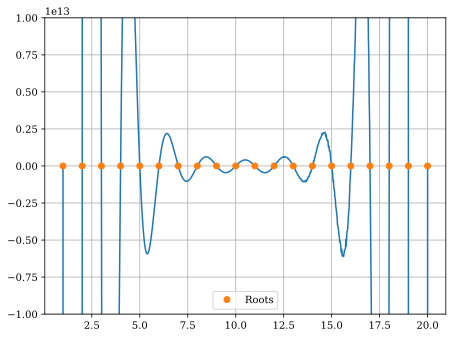

In [20]:
xp = np.linspace(1,20,1000)
#yp = mpoly(c,xp)
#yp = wpoly(xp)
yp = np.polyval(c,xp)
plt.plot(xp,yp)
plt.plot(np.arange(1,21),np.zeros(20),'o',label='Roots')
plt.legend()
plt.grid(True)
plt.ylim(-1e13,1e13);

Computing the polynomial as a monomial is subject to lot of rounding errors since the coefficients are very large.

Find the roots using numpy

In [21]:
np.roots(c)

array([19.99988881, 19.0011451 , 17.99439763, 17.01653936, 15.96390904,
       15.05398302, 13.93519009, 13.05950452, 11.95943341, 11.02299817,
        9.99057464,  9.0030391 ,  7.9992916 ,  7.0001177 ,  5.99998696,
        5.00000088,  3.99999997,  3.        ,  2.        ,  1.        ])

Randomly perturb the monomial coefficients and find roots

$$
c_0(1 + \epsilon r_0) x^{20} + c_1 (1+ \epsilon r_1) x^{19} + \ldots + c_{20}(1+ \epsilon r_{20})
$$

where $\epsilon = 10^{-10}$ and each $r_j$ is an independent Gaussian random variable with mean zero and standard deviation 1.

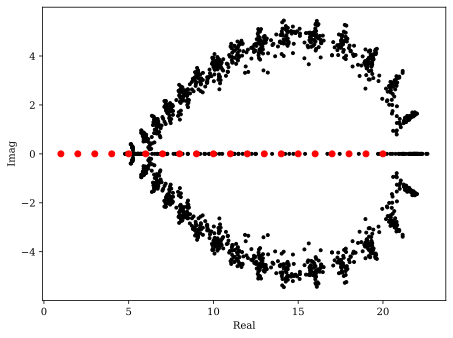

In [22]:
eps   = 1e-10 # Relative perturbation
nsamp = 100   # 100 random perturbations
for i in range(nsamp):
    r = np.random.normal(0.0, 1.0, 21)
    cc = c * (1 + eps * r)
    roots = np.roots(cc)
    plt.plot(np.real(roots), np.imag(roots),'k.')
plt.plot(np.arange(1,21),np.zeros(20), 'ro')
plt.xlabel('Real'); plt.ylabel('Imag');

The relative perturbation in coefficients is $O(10^{-10})$ while the change in roots is $O(1)$, which indicates a very high sensitivity wrt the coefficients.